In [39]:
import pandas as pd
import numpy as np

data = pd.read_csv('bank-additional/bank-additional-full.csv',sep=';')
data.drop(['pdays','duration'], axis = 1, inplace = True)

data['Y']=(data['y']=='yes').astype(int)
data.drop('y', axis = 1, inplace = True)

In [40]:
datatype = dict(data.dtypes)
catego_val = []
numerical_val = []
for key, item in datatype.items():
    if item == 'object':
        catego_val.append(key)
    else:
        numerical_val.append(key)

print (len(catego_val), catego_val)

10 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [41]:
from sklearn.preprocessing import StandardScaler

normal_val = ['emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m','nr.employed']

scale = StandardScaler()
normalized = scale.fit_transform(data[normal_val])

normalized_data = pd.DataFrame.from_dict(normalized)
normalized_data.columns = normal_val

In [42]:
dummy_data_noduration = pd.get_dummies(data=data, columns = catego_val)
dummy_data_noduration.columns
#since housing_unknown is completely identical as loan_unknown
dummy_data_noduration.drop('housing_unknown', axis = 1, inplace = True)

In [43]:
data_noduration_X = data.drop('Y', axis = 1)
data_noduration_Y = data['Y']

In [44]:
dummy_data_noduration_X = dummy_data_noduration.drop('Y', axis = 1)
dummy_data_noduration_Y = dummy_data_noduration['Y']

In [45]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(dummy_data_noduration_X, dummy_data_noduration_Y , test_size=0.2, random_state=42)

In [65]:
test_target.shape

(8238,)

In [46]:
from sklearn.cross_validation import KFold
kfolds = KFold(train_features.shape[0], n_folds = 5)

In [47]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# defines a classification tree
def NBClassifier(X_train,y_train,X_test,y_test, auc):
    clf = GaussianNB()
    clf.fit(X_train,y_train)
    if (auc==0):
        cm = confusion_matrix(clf.predict(X_test),y_test)
        return cm # (cm[0][0]+cm[1][1])/float(sum(cm))
    else:
        return roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])
    



0.76134106487627595

In [57]:
nb = GaussianNB()
nb.fit(train_features, train_target)
print (roc_auc_score(test_target,nb.predict_proba(test_features)[:,1]))

0.761341064876


In [48]:
from sklearn import linear_model
best_lr = linear_model.LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best_lr.fit(train_features, train_target)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
best_knn = KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')
best_knn.fit(train_features, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [50]:
from sklearn.tree import DecisionTreeClassifier
best_dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=120, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
best_dt.fit(train_features, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=120, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [61]:
from sklearn.ensemble import RandomForestClassifier
best_rf =RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
best_rf.fit(train_features, train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [51]:
from sklearn.neural_network import MLPClassifier
best_nn = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=43, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
best_nn.fit(train_features, train_target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=43, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return cm

Model: best_lr-------------------------------------
Mean squared error: 0.1032
Variance score: -0.0255
F1 score: 0.2917
Precision: 0.6604
Confusion matrix, without normalization
[[7213   90]
 [ 760  175]]


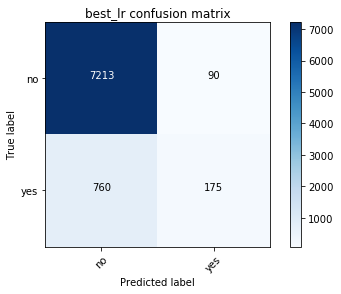

Model: best_knn-------------------------------------
Mean squared error: 0.1092
Variance score: -0.0858
F1 score: 0.2695
Precision: 0.5589
Confusion matrix, without normalization
[[7172  131]
 [ 769  166]]


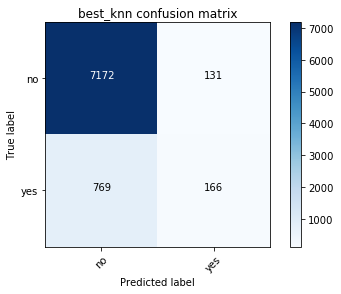

Model: best_dt-------------------------------------
Mean squared error: 0.1066
Variance score: -0.0593
F1 score: 0.3860
Precision: 0.5576
Confusion matrix, without normalization
[[7084  219]
 [ 659  276]]


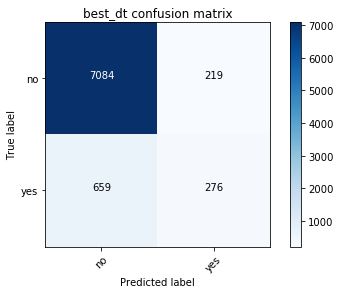

Model: best_rf-------------------------------------
Mean squared error: 0.1035
Variance score: -0.0291
F1 score: 0.3192
Precision: 0.6289
Confusion matrix, without normalization
[[7185  118]
 [ 735  200]]


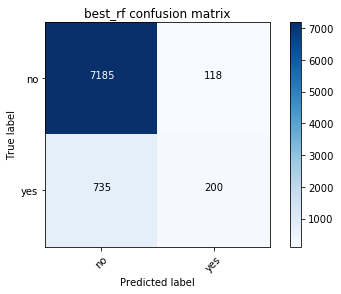

Model: best_nn-------------------------------------
Mean squared error: 0.1112
Variance score: -0.1051
F1 score: 0.1226
Precision: 0.5872
Confusion matrix, without normalization
[[7258   45]
 [ 871   64]]


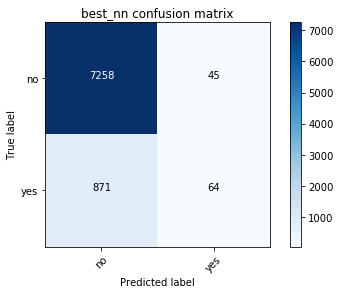

Model: naive_bayes-------------------------------------
Mean squared error: 0.1690
Variance score: -0.6794
F1 score: 0.4176
Precision: 0.3430
Confusion matrix, without normalization
[[6347  956]
 [ 436  499]]


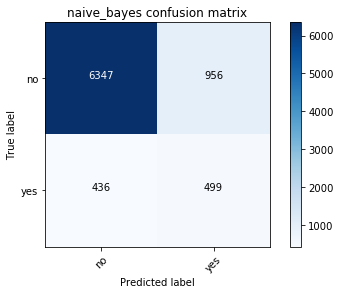

The profit expection for each model is : [17235, 16303, 27105, 19682, 6291, 48445]
The opportunity profit expection for each model is : [9635, 8613, 20515, 12332, -2419, 44085]
done


In [94]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error,r2_score
import itertools
# lr_grid_search, knn_grid_search,nn_grid_search,dt_grid_search
# test set features and labels

test_X = test_features
test_Y = test_target 

models = [best_lr, best_knn, best_dt, best_rf, best_nn, nb]
modelsName = ["best_lr" ,"best_knn","best_dt",'best_rf',"best_nn", 'naive_bayes']

economic_profit_matrix = [[0,-1],[0,99]]
opportunity_profit_matrix = [[0,-1],[-10,99]]

profit_list = list()
opportunity_list = list()

for m,n in zip(models, modelsName):
    predict_y = m.predict(test_X)
    # The mean squared error
    print("Model: " + str(n) + "-------------------------------------")
    print("Mean squared error: %.4f" % mean_squared_error(test_Y, predict_y))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.4f' % r2_score(test_Y, predict_y))
    # The f1 score
    print("F1 score: %0.4f" % f1_score(test_Y, predict_y))
    # Precision
    print("Precision: %0.4f" % precision_score(test_Y, predict_y,average='binary'))
    # Confusion matrix
    cnf_matrix = confusion_matrix(test_Y, predict_y)
    plt.figure()
    cm = plot_confusion_matrix(cnf_matrix, classes=['no', 'yes'], title='%s confusion matrix'%(n))
    plt.savefig(n)
    plt.show()
    profit_list.append(np.multiply(cm, economic_profit_matrix).sum())
    opportunity_list.append(np.multiply(cm, opportunity_profit_matrix).sum())

print("The profit expection for each model is :",profit_list)
print("The opportunity profit expection for each model is :",opportunity_list)
print("done")


In [84]:
def plot_roc(model, name):
    scores = model.predict_proba(test_features)[:,1]
    fpr, tpr, thresholds = roc_curve(test_target, scores)
    roc_auc = auc(fpr, tpr)   
    plt.plot(fpr, tpr, lw=1, alpha=1,
             label='ROC %s (AUC = %0.4f)' % (name, roc_auc))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

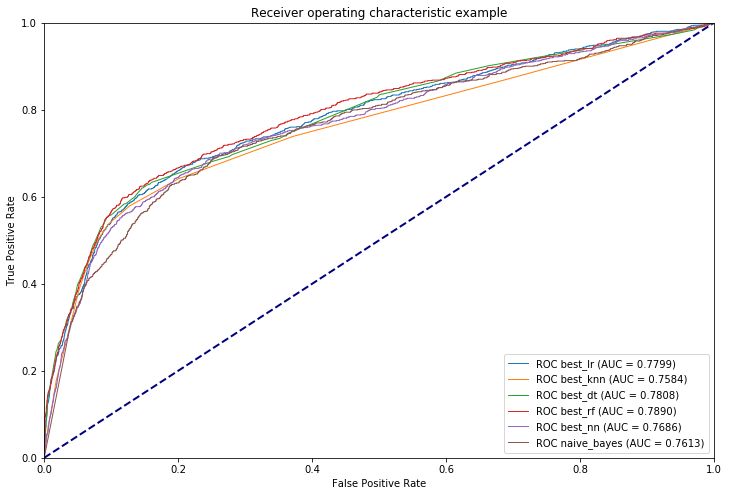

In [78]:
plt.gcf().clear()
plt.figure(figsize=(12,8))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for m,n in zip(models, modelsName):
    plot_roc(m, n)

plt.show()